<a href="https://colab.research.google.com/github/VenkatsaiKeesara/TITANIC-SURVIVAL-PREDICTION/blob/main/Titanic_Survival_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

Data Collection & Processing

In [ ]:
#csv file to pandas
titanic_data = pd.read_csv('/content/train.csv')

In [ ]:
#first 5 rows of dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#number of rows and colums
titanic_data.shape

(891, 12)

In [ ]:
#information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# missing values in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling the missing values

In [ ]:
# Drop 'Cabin'
titanic_data.drop(columns=['Cabin'], inplace=True)

In [33]:
# Fill missing 'Age' with median
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [34]:
# Fill missing 'Embarked' with the most frequent value
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])




In [ ]:
# missing values in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Analysis

In [ ]:
#statistical data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#no of people survived and non survived
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


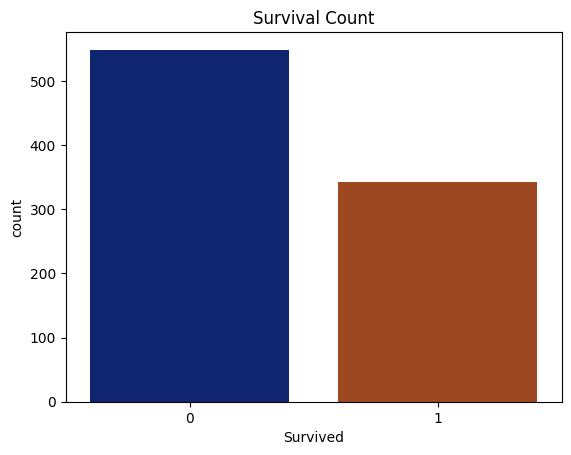

In [35]:
# Visualize the distribution of survivors vs non-survivors.
sns.countplot(x='Survived', data=titanic_data, hue='Survived', palette='dark', legend=False)
plt.title('Survival Count')
plt.show()

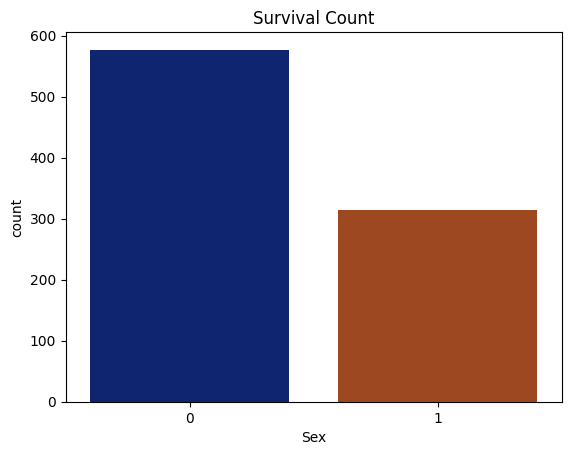

In [36]:
# Visualize the distribution of 'SEX'.
sns.countplot(x='Sex', data=titanic_data, hue='Sex', palette='dark', legend=False)
plt.title('Survival Count')
plt.show()

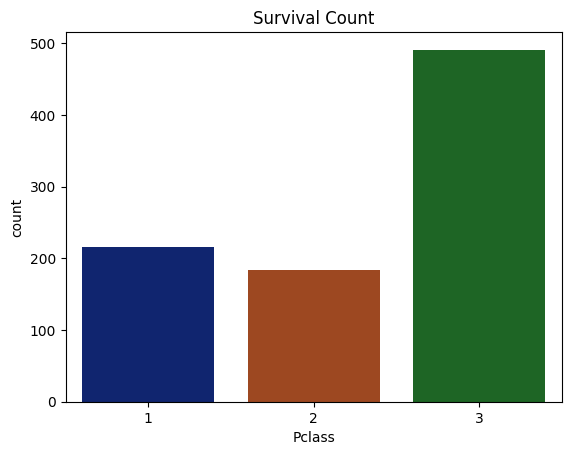

In [37]:
# Visualize the distribution of 'Pclass'.
sns.countplot(x='Pclass', data=titanic_data, hue='Pclass', palette='dark', legend=False)
plt.title('Survival Count')
plt.show()

 Encoding Categorical Variables

In [ ]:
# Convert 'Sex' to numerical values
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values (S = 0, C = 1, Q = 2)
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
#Feature Selection
# Selecting relevant features
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = titanic_data['Survived']


In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the Data into Training and Test Sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape,X_train.shape,X_test.shape)

(891, 10) (712, 10) (179, 10)


Model Building

Logistic Regression

In [47]:
model = LogisticRegression()

In [67]:
#training LogisticRegression model with training data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'titanic_data' is your DataFrame and 'Survived' is the target
X = titanic_data.drop('Survived', axis=1)  # Features (drop target column)
y = titanic_data['Survived']  # Target column (Survived)

# Handle missing values (if any)
X.ffill(inplace=True)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define columns to be processed
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# Create a pipeline that first processes the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline (this will automatically preprocess the data and train the model)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Name', 'Ticket'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

Model Evaluation

Accuracy Score

In [51]:
#accuracy on training
# Accuracy on training set using the pipeline
X_train_prediction = pipeline.predict(X_train)

# Optionally, evaluate the accuracy of the model on training data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, X_train_prediction)
print(f"Training Accuracy: {accuracy:.4f}")


Training Accuracy: 0.9101


In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [52]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 0.5407303370786517


In [54]:
#accuracy on testing
# Predict using the pipeline (this applies preprocessing automatically)
X_test_prediction = pipeline.predict(X_test)

# Optionally, evaluate accuracy on the testing set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, X_test_prediction)
print(f"Testing Accuracy: {accuracy:.4f}")


Testing Accuracy: 0.8156


In [ ]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [56]:
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of testing data :',test_data_accuracy)

Accuracy score of testing data : 0.4860335195530726


Feature Importance


In [57]:
# For Logistic Regression, use the coefficients as feature importance
import pandas as pd
preprocessor = pipeline.named_steps['preprocessor']
categorical_columns = X.select_dtypes(include=['object']).columns
one_hot_columns = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)
all_feature_names = list(X.select_dtypes(include=['int64', 'float64']).columns) + list(one_hot_columns)
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})
print(feature_importance_df)


                 Feature  Coefficient
0            PassengerId     0.089269
1                 Pclass    -0.840671
2                    Sex     1.373644
3                    Age    -0.435846
4                  SibSp    -0.327203
...                  ...          ...
1273   Ticket_W./C. 6607    -0.411140
1274   Ticket_W./C. 6608    -0.658506
1275  Ticket_W.E.P. 5734    -0.186892
1276    Ticket_W/C 14208    -0.153511
1277    Ticket_WE/P 5735    -0.043202

[1278 rows x 2 columns]


Final Prediction on Test Data


In [66]:
# Define the features to be used for the model
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Select these features from both the training and test datasets
X_train = titanic_data.loc[X_train.index, selected_features]  # Use X_train.index to select the same rows from titanic_data
X_test = titanic_data.loc[X_test.index, selected_features]    # Use X_test.index to select the same rows from titanic_data
y_train = titanic_data.loc[X_train.index, 'Survived']
y_test = titanic_data.loc[X_test.index, 'Survived']

# Handle missing values (if any)
X_train.ffill(inplace=True)
X_test.ffill(inplace=True)





